# Clustering by KMeans

For this exercise we are going to use the KMeans algorithm to cluster the data by the module scikit-learn in Python. The data that we are going to use is the Iris dataset, which is a dataset that contains 150 samples of iris flowers. Each sample has 4 features: sepal length, sepal width, petal length and petal width. The samples are labeled with the species of the iris flower that they belong to. The species are: setosa, versicolor and virginica.

The goal of this exercise is to cluster the samples in the dataset using the KMeans algorithm and compare the clusters with the labels of the samples. First at all we need to import the libraries that we are going to use.

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

After that we are going to load the Iris dataset and create a DataFrame with the data, choose only the numerical columns and skip the categorical column present in the dataset, also, we select the target column to compare the clusters with the labels.

In [10]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we are going to customize the Kmeans algorithm present in the scikit-learn library, for this case we are going to use the KMeans algorithm with 3 clusters, because we have 3 species of iris flowers, for the *init* parameter we are going to use the value *k-means++* to initialize the centroids, this means that the algorithm will choose the initial centroids in a smart way to speed up the convergence, the *max_iter* parameter is the maximum number of iterations of the algorithm for a single run, at last the *random_state* parameter is the seed used by the random number generator.

When we have the model set up, we use the fit method to train the model and the predict method to predict the labels of the samples.

In [5]:
kmeans =KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\aespondac\AppData\Local\anaconda3\envs\ML_KMeans\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


At this step, we are going to compare the clusters with the labels of the samples, for this we are going to use the crosstab function of the pandas library, this function creates a cross-tabulation of two or more factors, in this case we are going to compare the clusters with the labels of the samples.

The result of the crosstab function is a table that shows the number of samples that are in each cluster and the number of samples that are in each label. 

In [11]:
iris_df['cluster'] = kmeans.labels_
iris_df.groupby(['target', 'cluster']).agg({'sepal length (cm)': 'count'})


sepal length (cm)
target cluster                   
0      1                       50
1      0                       47
       2                        3
2      0                       14
       2                       36

In order to comprehend the results and the performance of the model, we are going to use sklearn.decomposition, especifically PCA, to reduce the dimensionality of the data and plot the clusters in a 2D graph.

PCA works by calculating the eigenvectors of the covariance matrix of the data and using them to project the data into a new subspace. The number of eigenvectors to use is a hyperparameter that can be tuned. In this case, we are going to use 2 eigenvectors to project the data into a 2D space as we can see in the table below.


In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_res=pca.fit_transform(iris.data)
iris_df['X']=pca_res[:,0]
iris_df['Y']=pca_res[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,X,Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


Finally, we are going to plot the clusters in a 2D graph and compare them with the labels of the samples, using matplotlib, the plot shows the samples in the dataset, the clusters predicted by the KMeans algorithm and the labels of the samples. The X axis represents the first eigenvector and the Y axis represents the second eigenvector.

The plot shows that the KMeans algorithm was able to cluster the samples in the dataset in a way that is very similar to the labels of the samples, this means that the algorithm was able to learn the patterns present in the data and cluster the samples in a way that is very similar to the labels of the samples.

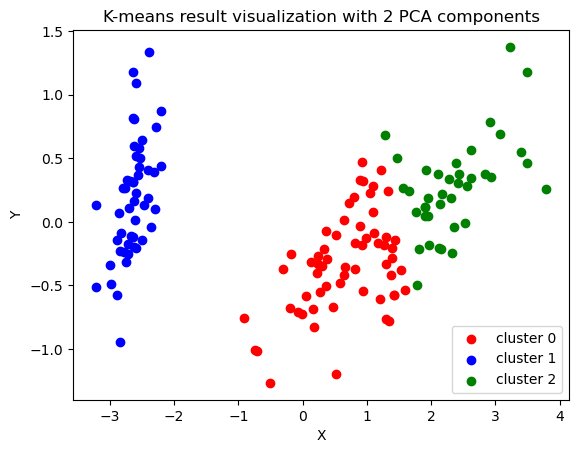

In [13]:
cluster_0 = iris_df[iris_df['cluster']==0]
cluster_1 = iris_df[iris_df['cluster']==1]
cluster_2 = iris_df[iris_df['cluster']==2]

plt.scatter(cluster_0['X'], cluster_0['Y'], color='red', label='cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], color='blue', label='cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], color='green', label='cluster 2')
plt.legend()
plt.title('K-means result visualization with 2 PCA components')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()